### Import Library

In [1]:
# 라이브러리 설치
import pandas as pd
import numpy as np
import os
import random

import duckdb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import time
from tqdm.auto import tqdm

import missingno as msno

### Fixed Seed

In [2]:
# import zipfile
# file_name = 'open.zip'
# output_dir = '/home/dabs/InHeon/데이콘/웹광고/data'
# zip_file = zipfile.ZipFile(file_name)
# zip_file.extractall(path=output_dir)

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

### 데이터 랜덤 샘플링

In [3]:
# train_path = '/home/dabs/InHeon/데이콘/웹광고/data/train.csv'

# con = duckdb.connect()

# df = con.query(f"""(SELECT *
#                         FROM read_csv_auto('{train_path}')
#                         WHERE Click = 0
#                         ORDER BY random()
#                         LIMIT 23000)
#                         UNION ALL
#                         (SELECT *
#                         FROM read_csv_auto('{train_path}')
#                         WHERE Click = 1
#                         ORDER BY random()
#                         LIMIT 5000)""").df()

# con.close()
# df.head()

In [4]:
# df = df.drop('ID', axis=1).copy()
# df.to_csv('./data/sample_02.csv', index=False)

In [92]:
df = pd.read_csv('./data/sample_01.csv')
test = pd.read_csv('./data/test.csv')

In [93]:
df

,Click,F01,F02,F03,F04,F05,F06,F07,F08,F09,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,0,BIVXQZM,LPMWORB,KFOPSGX,14.0,ASQFTLC,0,EBFZJHW,GZFPAGW,FUPISVE,...,OACUGUM,GTISJWW,26848.0,0.0,UWHIZMO,IRUDRFB,1.0,OOQBJMI,0.0,MHPHGKW
1,0,LAARXUM,RNCJZPY,HUUWYSX,5.0,UOEOOKN,0,PQZBVMG,FTPHMPQ,WSROWBW,...,WWWEXSL,GTISJWW,4157.0,0.0,WOBNNNB,IRUDRFB,2.0,ZQBKPPO,3.0,MWQVEDA
2,0,JCDXFYU,PILDDJU,IAGJDOH,24.0,LFPUEOV,9,GJMEZIP,FTPHMPQ,FPCZMEO,...,SGFEOVO,KHZNEZF,195.0,10.0,QMOULXS,IRUDRFB,27.0,RWQBLLR,0.0,LFRPDPW
3,0,JCDXFYU,PILDDJU,IAGJDOH,51.0,LFPUEOV,54,MWYXRQK,FTPHMPQ,BEZTQIO,...,MFPUCBU,KHZNEZF,2347.0,0.0,QMOULXS,IRUDRFB,27.0,ZVSTLNM,0.0,GVRZOHG
4,0,JCDXFYU,PILDDJU,IAGJDOH,47.0,LFPUEOV,11,IYNIXVX,FTPHMPQ,GUIHGKT,...,NZGEZLW,KHZNEZF,1280.0,0.0,QMOULXS,IRUDRFB,10.0,VPKYNYE,0.0,EEKPDYB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,1,VNOHLIR,PKLDGLX,IAGJDOH,6.0,EVTUBMN,36,PQZBVMG,LPYPUNA,VMZCHXY,...,WSCZDMB,GTISJWW,7237.0,0.0,SHMKPOR,IRUDRFB,2.0,NATXQIW,0.0,XXWOBVT
279996,1,RVMYLQZ,HTZNQPW,NaN,6.0,CHAJYKQ,60,QVATFJM,FTPHMPQ,QZCZHKM,...,IXMTZCR,GTISJWW,139.0,0.0,TIZLZJH,IRUDRFB,4.0,GZPJZBH,0.0,UWQQBNX
279997,1,JCDXFYU,PILDDJU,IAGJDOH,NaN,LFPUEOV,-1,PPAHEML,FTPHMPQ,QCIJSDF,...,WVTRIIE,KHZNEZF,3860.0,0.0,QMOULXS,IRUDRFB,NaN,XLDEUVO,0.0,CWWXORU
279998,1,LLKAVMO,EKJSVRG,NaN,6.0,YKHABYT,69,RDZTCKR,MIGYEEG,VEHUCWI,...,SLXYBBG,GTISJWW,3022.0,0.0,ABEHJLN,IRUDRFB,5.0,ZHUJGMJ,0.0,QHKAWMA


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 40 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Click   280000 non-null  int64  
 1   F01     268136 non-null  object 
 2   F02     268136 non-null  object 
 3   F03     176832 non-null  object 
 4   F04     224130 non-null  float64
 5   F05     268136 non-null  object 
 6   F06     280000 non-null  int64  
 7   F07     280000 non-null  object 
 8   F08     280000 non-null  object 
 9   F09     280000 non-null  object 
 10  F10     268136 non-null  object 
 11  F11     251288 non-null  float64
 12  F12     268136 non-null  object 
 13  F13     280000 non-null  object 
 14  F14     280000 non-null  int64  
 15  F15     176832 non-null  object 
 16  F16     280000 non-null  object 
 17  F17     280000 non-null  object 
 18  F18     208656 non-null  float64
 19  F19     254684 non-null  float64
 20  F20     176832 non-null  object 
 21  F21     28

### Detecting Missing Values

In [95]:
def missing_value_table(df):
    # Total missing_values
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * (mis_val / len(df))
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns =mis_val_table.rename(
        columns= {0: 'Missing Values', 1: " % of Total Values"}
    )
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(' % of Total Values', ascending=False).round(1)
    
    
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0])+
          " columns that have missing values")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [96]:
train_missing = missing_value_table(df)
train_missing

Your selected dataframe has 40 columns.
There are 21 columns that have missing values


,Missing Values,% of Total Values
F27,108442,38.7
F29,108442,38.7
F03,103168,36.8
F15,103168,36.8
F20,103168,36.8
F26,103168,36.8
F24,88730,31.7
F36,71344,25.5
F18,71344,25.5
F04,55870,20.0


<AxesSubplot:>

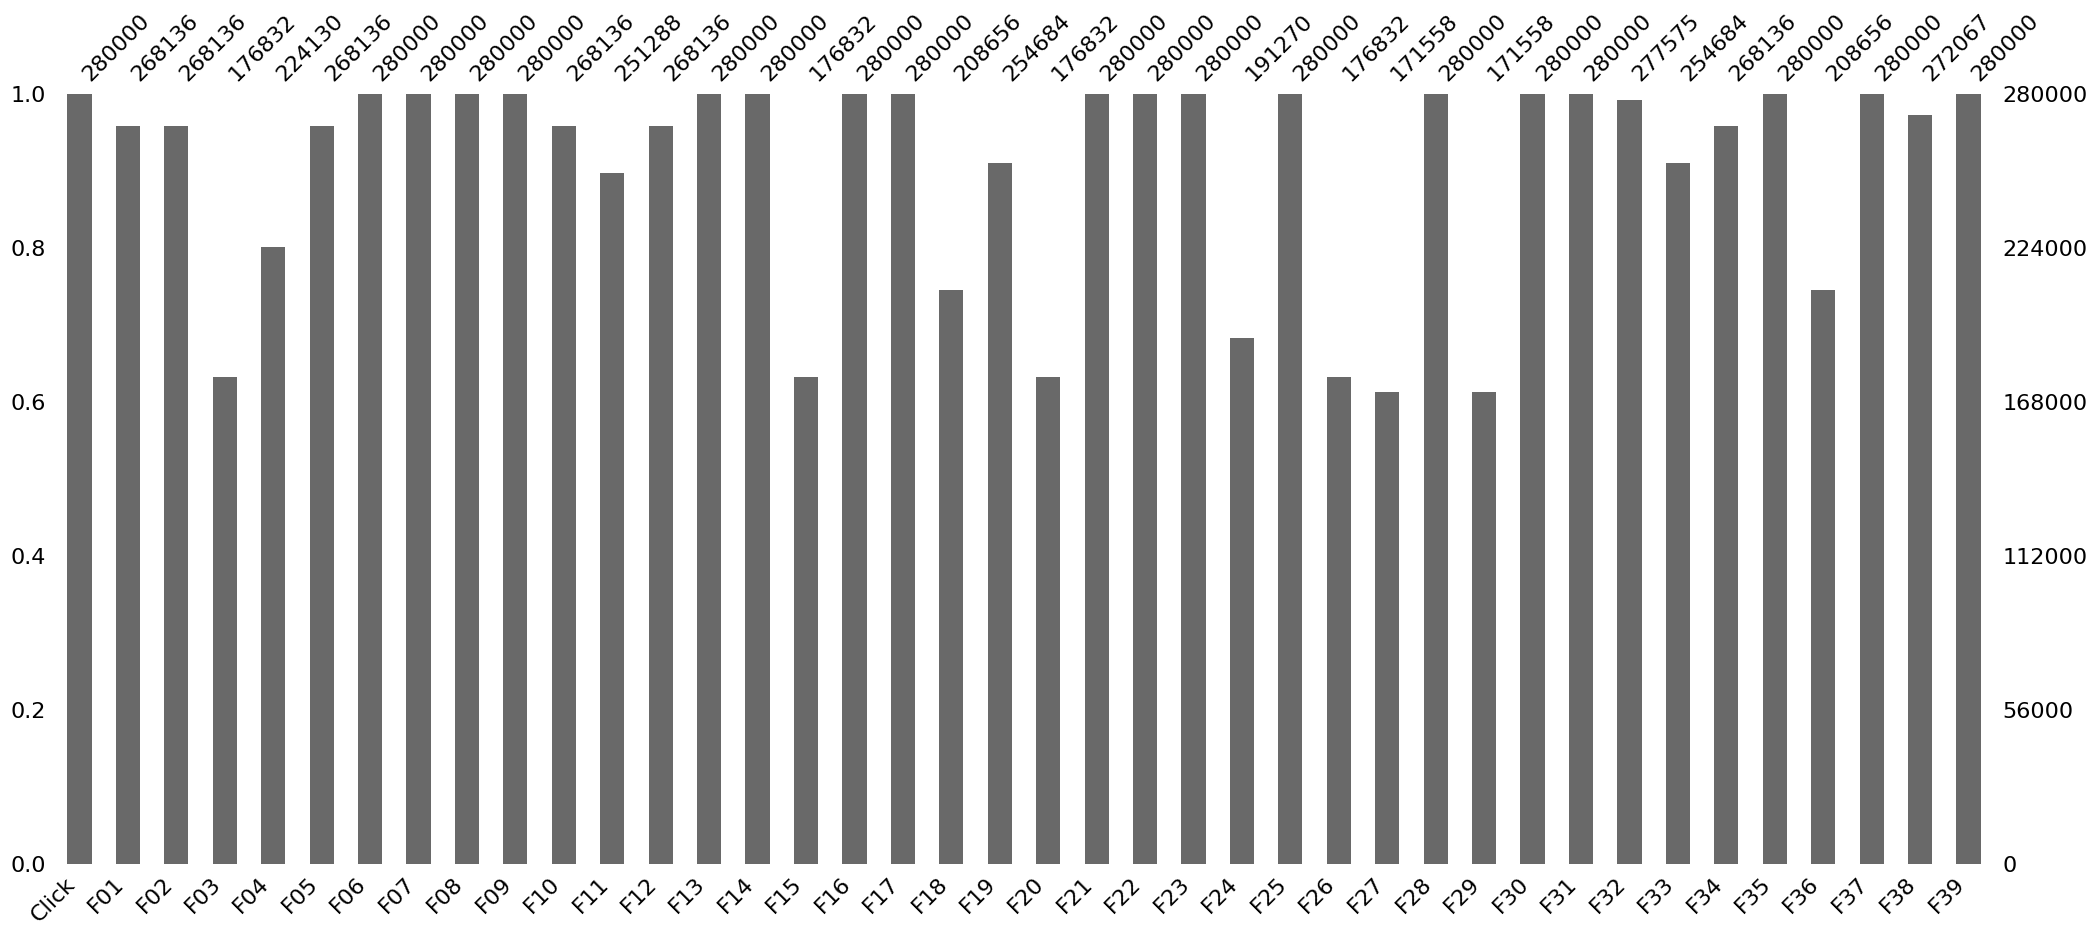

In [97]:
msno.bar(df)

<AxesSubplot:>

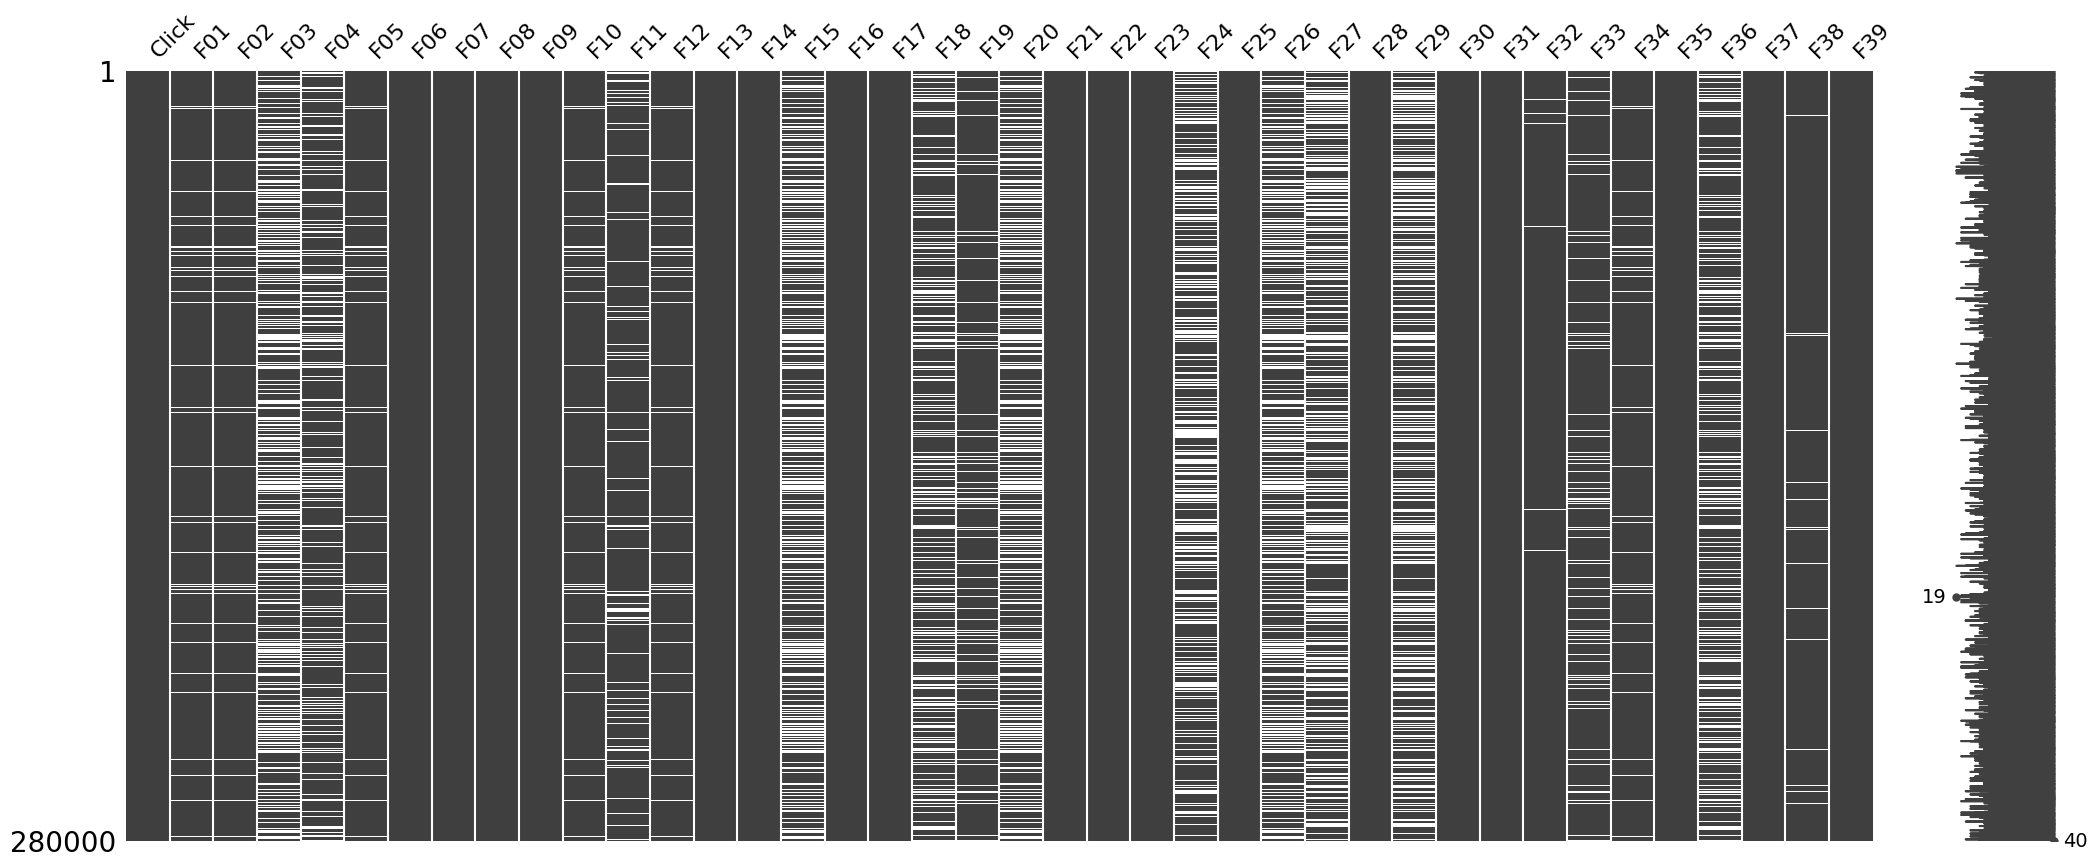

In [98]:
msno.matrix(df)

### Reasons for Missing Values

1. **Missing Completely at Random (MCAR)**
> The missing values on a given variable (Y) are not asscociated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. **Missing at Random (MAR)**
> MAR occurs when the missingness is not random, but where missingness can be fully accounted for by varibales where theire is complete information.

3. **Missing Not a Random(MNAR)**
> Missingness depends on unobserved data or the value of the missing data itself.

<AxesSubplot:>

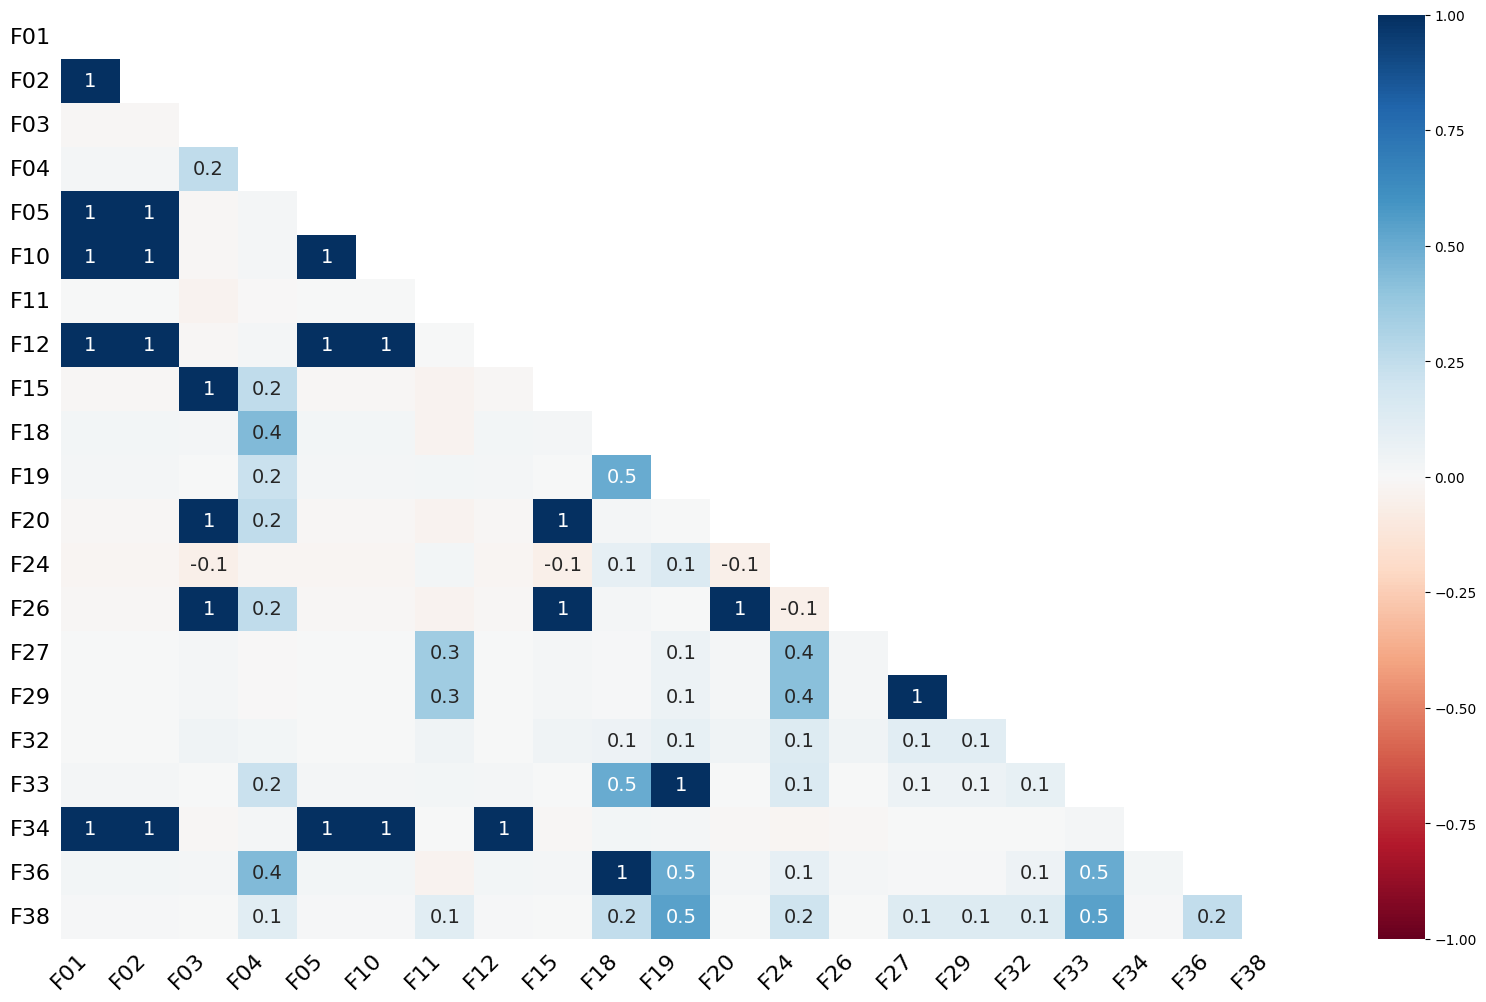

In [99]:
msno.heatmap(df)

### Colleations
1. F01, F02, F05, F10, F12, F34 are 1
2. F03, F15, F20, F26 are 1
3. F24 is MAR

### Finding reason for missing data using Dendrogram

A dendrogram is a tree diagram of missingness.  
It groups the highly correlated variables together.

<AxesSubplot:>

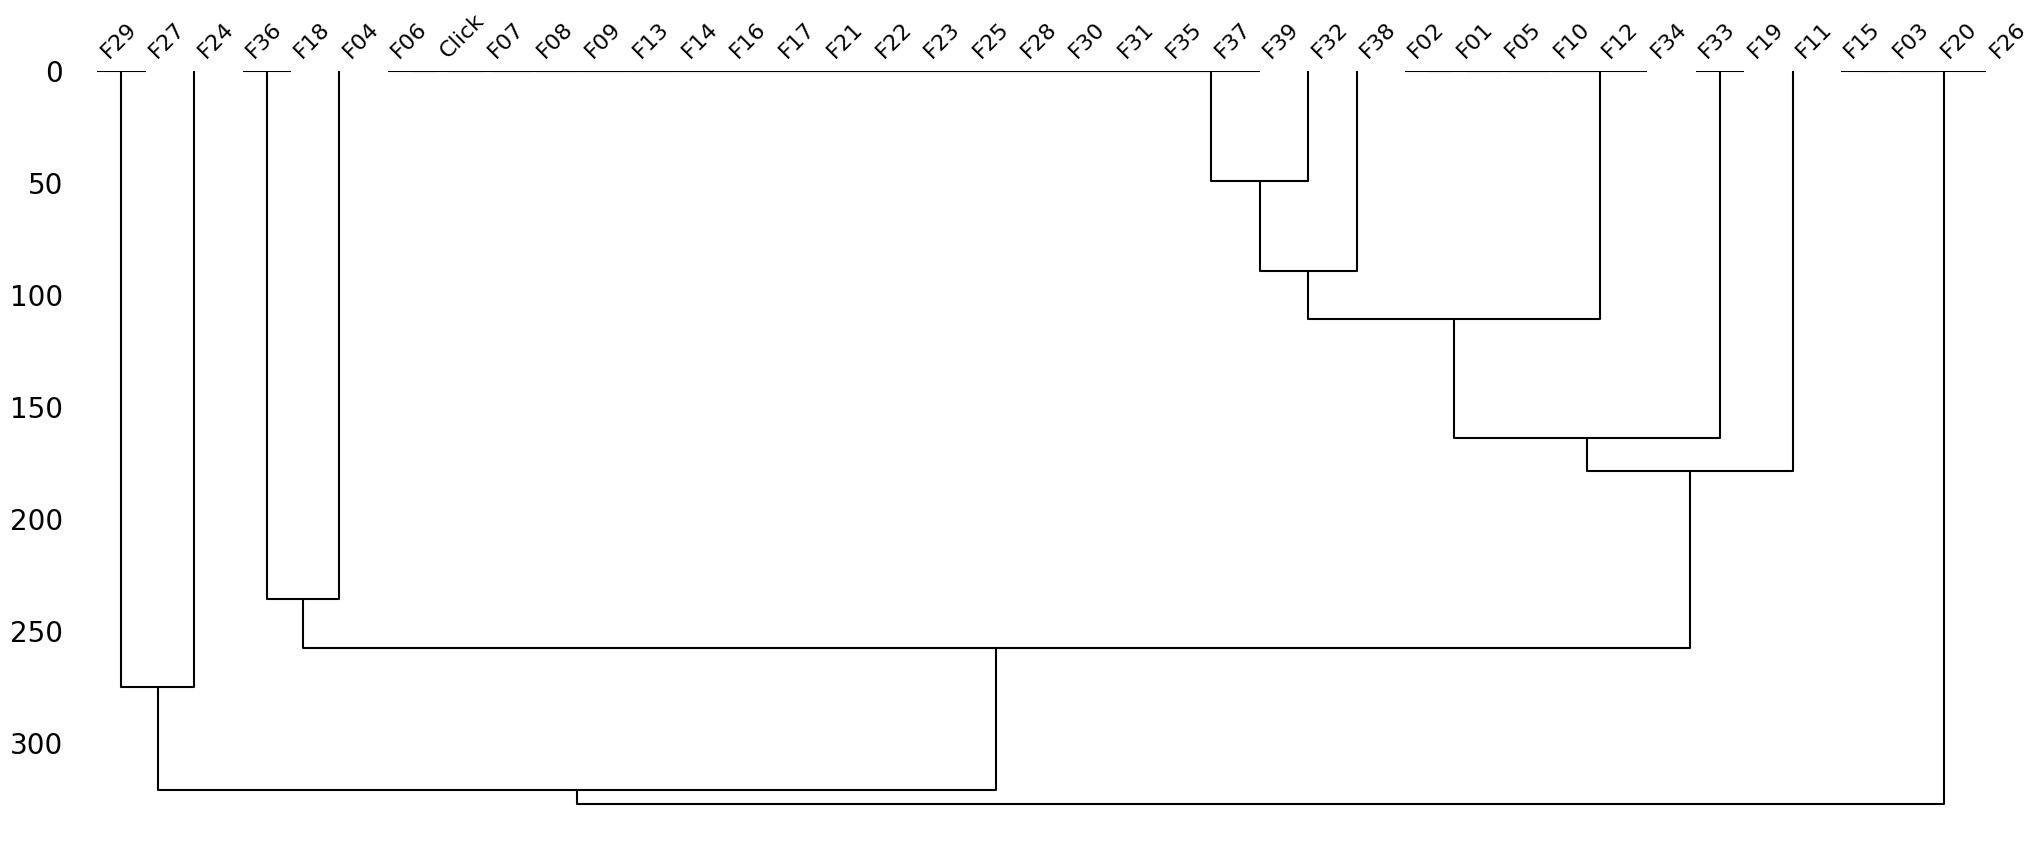

In [100]:
msno.dendrogram(df)

> Let's read the above dendrogram from a top-down perspective:  
>   - Cluster leaves which linked together at a distance of zero fully predict one another's presence - one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on (missingno document)  
> ---

### Treating Missing values

After having identified the pattern in missing values, it is important to treat them too. Here is a flowchart which could prove handy:

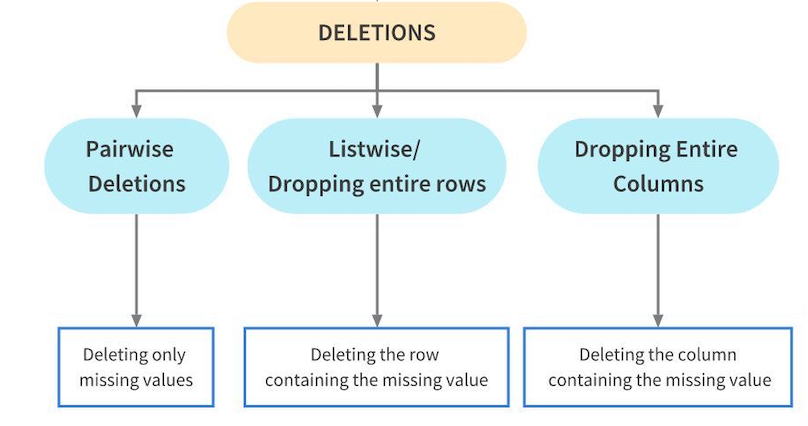

### Pairwise Deletion
Pairwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean, sum, etc intrinsically skip missing values.

In [101]:
df.isnull().sum()

Click         0
F01       11864
F02       11864
F03      103168
F04       55870
F05       11864
F06           0
F07           0
F08           0
F09           0
F10       11864
F11       28712
F12       11864
F13           0
F14           0
F15      103168
F16           0
F17           0
F18       71344
F19       25316
F20      103168
F21           0
F22           0
F23           0
F24       88730
F25           0
F26      103168
F27      108442
F28           0
F29      108442
F30           0
F31           0
F32        2425
F33       25316
F34       11864
F35           0
F36       71344
F37           0
F38        7933
F39           0
dtype: int64

In [102]:
df['F04'].mean() # pandas skips the missing values and calculates mean of the remaining values.

31.16614910989158

### Listwise Deletion / Dropping lows
> During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case Deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values  

### Dropping complete columns 
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

### Imputations Techniques for non Tiem Series Probelms
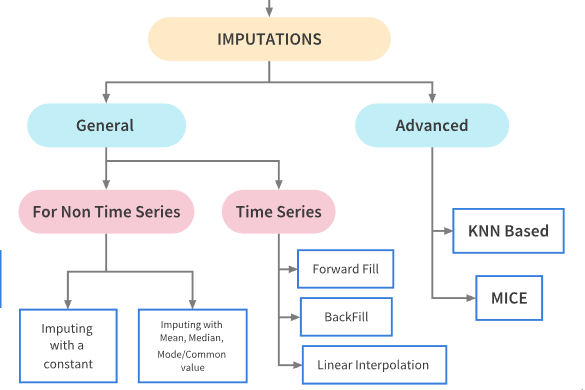

> Imputation refers to replacing missing data with substituted values. There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data. Depending Upon the nature of the probelm, imputation techniques can be broadly they can be classified as follows:  
> 

#### Basic Imputation Techniques
- Imputation with a constant value
- Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located  

For this we shall use the 
>The SimpleImputer 
class from sklearn

In [103]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='constant')
mean_imputer = SimpleImputer(strategy='most_frequent')

### Imputations Techniques for Time Series Problems
Now let's look at ways to impute data in a typical time series problem. Tackling missing values in time Series problem is a bit different.
The **Fillna()** method is used for imputing missing values in such problems.

- Basic imputation Techniques
    - 'ffill' or 'pad' - Replace NaNs with last observed value
    - 'bfill' or 'backfill' - Replace NaNs with next observed value
    - Linear interpolation method

In [104]:
### Imputation using ffill
df['F04'].fillna(method='ffill').mean()

31.29016785714286

In [105]:
### Imputation using bfill
df['F04'].fillna(method='bfill').mean()

30.55591785714286

### Imputation using Linear Interpolation method
Time Seires data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the best possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values filled with incrementing or decrementing values.  

Linear interpolating is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

Refer to the official documentation for a complete list of interpolation stratgies [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [106]:
train_missing

,Missing Values,% of Total Values
F27,108442,38.7
F29,108442,38.7
F03,103168,36.8
F15,103168,36.8
F20,103168,36.8
F26,103168,36.8
F24,88730,31.7
F36,71344,25.5
F18,71344,25.5
F04,55870,20.0


In [107]:
missing_high = train_missing[train_missing[' % of Total Values'] >= 30].index.tolist()
missing_median = train_missing[(train_missing[' % of Total Values'] >= 5) &
                               (train_missing[' % of Total Values'] < 30)].index.tolist()
missing_low = train_missing[(train_missing[' % of Total Values'] < 5)].index.tolist()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 40 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Click   280000 non-null  int64  
 1   F01     268136 non-null  object 
 2   F02     268136 non-null  object 
 3   F03     176832 non-null  object 
 4   F04     224130 non-null  float64
 5   F05     268136 non-null  object 
 6   F06     280000 non-null  int64  
 7   F07     280000 non-null  object 
 8   F08     280000 non-null  object 
 9   F09     280000 non-null  object 
 10  F10     268136 non-null  object 
 11  F11     251288 non-null  float64
 12  F12     268136 non-null  object 
 13  F13     280000 non-null  object 
 14  F14     280000 non-null  int64  
 15  F15     176832 non-null  object 
 16  F16     280000 non-null  object 
 17  F17     280000 non-null  object 
 18  F18     208656 non-null  float64
 19  F19     254684 non-null  float64
 20  F20     176832 non-null  object 
 21  F21     28

In [109]:
obj_cols = df.select_dtypes('object').columns.tolist()
num_cols = df.select_dtypes('number').columns.tolist()

### Missing low

In [110]:
missing_low_obj = [col for col in missing_low if col in obj_cols]
missing_low_num = [col for col in missing_low if col in num_cols]

print(missing_low)
print(f"missing obj: {missing_low_obj}\n"
      f"missing num: {missing_low_num}")

['F34', 'F01', 'F02', 'F12', 'F10', 'F05', 'F38', 'F32']
missing obj: ['F34', 'F01', 'F02', 'F12', 'F10', 'F05']
missing num: ['F38', 'F32']


In [111]:
df[missing_low_num].describe()

,F38,F32
count,272067.000000,2.775750e+05
mean,0.183539,1.983496e+04
std,1.851382,7.291227e+04
min,0.000000,0.000000e+00
25%,0.000000,3.650000e+02
50%,0.000000,2.744000e+03
75%,0.000000,1.038550e+04
max,234.000000,2.110930e+06


In [115]:
for col in obj_cols:
    df[col] = df[col].fillna('NaN')
    test[col] = test[col].fillna('NaN')

In [121]:
test = test.drop('ID', axis=1)

KeyError: "['ID'] not found in axis"

In [124]:
for col in num_cols:
    try:
        df[col] = df[col].interpolate(method='linear')
        test[col] = test[col].interpolate(method='linear')
    except:
        pass

In [125]:
X = df.drop('Click', axis=1).copy()
y = df['Click'].copy()

In [127]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import category_encoders as ce

enc = ce.TargetEncoder(cols=obj_cols).fit(X, y)
X_encoded = enc.transform(X)
X_test_encoded = enc.transform(test)

In [130]:
X_encoded

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,0.155338,0.148575,0.178769,14.0,0.155338,0,0.248240,0.241870,0.173246,0.148575,...,0.175246,0.187474,26848.0,0.0,0.148575,0.188207,1.0,0.202532,0.0,0.243304
1,0.155338,0.189734,0.193662,5.0,0.155338,0,0.135758,0.161482,0.106909,0.108471,...,0.175908,0.187474,4157.0,0.0,0.170367,0.188207,2.0,0.060682,3.0,0.310183
2,0.140894,0.140924,0.155727,24.0,0.140894,9,0.149678,0.161482,0.152032,0.140894,...,0.143247,0.140896,195.0,10.0,0.140894,0.188207,27.0,0.152032,0.0,0.193878
3,0.140894,0.140924,0.155727,51.0,0.140894,54,0.253731,0.161482,0.118189,0.140894,...,0.179450,0.140896,2347.0,0.0,0.140894,0.188207,27.0,0.118189,0.0,0.191009
4,0.140894,0.140924,0.155727,47.0,0.140894,11,0.151943,0.161482,0.172159,0.140894,...,0.177497,0.140896,1280.0,0.0,0.140894,0.188207,10.0,0.172159,0.0,0.134298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,0.173487,0.173487,0.155727,6.0,0.173487,36,0.135758,0.198025,0.162338,0.173487,...,0.208955,0.187474,7237.0,0.0,0.173487,0.188207,2.0,0.171435,0.0,0.202710
279996,0.116397,0.115230,0.199519,6.0,0.116397,60,0.295092,0.161482,0.205787,0.115230,...,0.232113,0.187474,139.0,0.0,0.116397,0.188207,4.0,0.125693,0.0,0.175259
279997,0.140894,0.140924,0.155727,6.0,0.140894,-1,0.420897,0.161482,0.171706,0.140894,...,0.177841,0.140896,3860.0,0.0,0.140894,0.188207,4.5,0.171706,0.0,0.305556
279998,0.218278,0.219813,0.199519,6.0,0.218278,69,0.217054,0.215994,0.317778,0.218278,...,0.179063,0.187474,3022.0,0.0,0.218278,0.188207,5.0,0.318654,0.0,0.281598


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    stratify=y,
                                                    test_size=0.15)

model = CatBoostClassifier(iterations=10000,
                         learning_rate=0.01,
                         l2_leaf_reg=5e-3,
                         max_depth=16,
                         verbose=500,
                         task_type="GPU",
                         devices='1')

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          early_stopping_rounds=50,
          )

0:	learn: 0.6755579	test: 0.6759304	best: 0.6759304 (0)	total: 678ms	remaining: 1h 53m 1s
500:	learn: 0.1082614	test: 0.2432098	best: 0.2427066 (457)	total: 5m 42s	remaining: 1h 48m 21s
bestTest = 0.2427066127
bestIteration = 457
Shrink model to first 458 iterations.


In [132]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9000476190476191
0.7534202898550724


In [133]:
from sklearn.metrics import roc_curve, auc

In [134]:
score = model.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, score, pos_label=1)
auc_score = auc(fpr, tpr)
print(auc_score)

0.9215303188405797


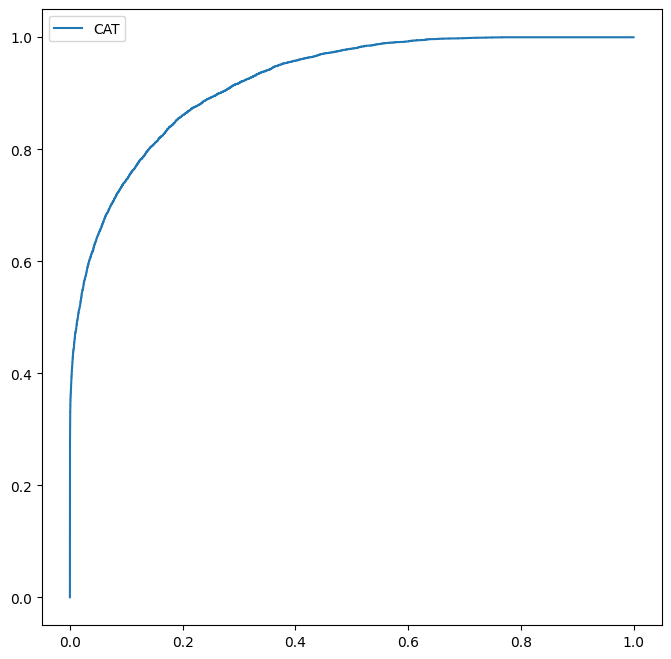

In [135]:
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(fpr, tpr, label='CAT')
ax.legend()
plt.show()

In [147]:
test_pred = model.predict(X_test_encoded)

In [148]:
np.unique(test_pred)

array([0, 1])

In [149]:
sample_submission = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/sample_submission.csv')
sample_submission['Click'] = test_pred
sample_submission.to_csv('./data/sample_02.csv', index=False)

sample = pd.read_csv('./data/sample_02.csv')
sample.head()

,ID,Click
0,TEST_0000000,0
1,TEST_0000001,0
2,TEST_0000002,0
3,TEST_0000003,0
4,TEST_0000004,0


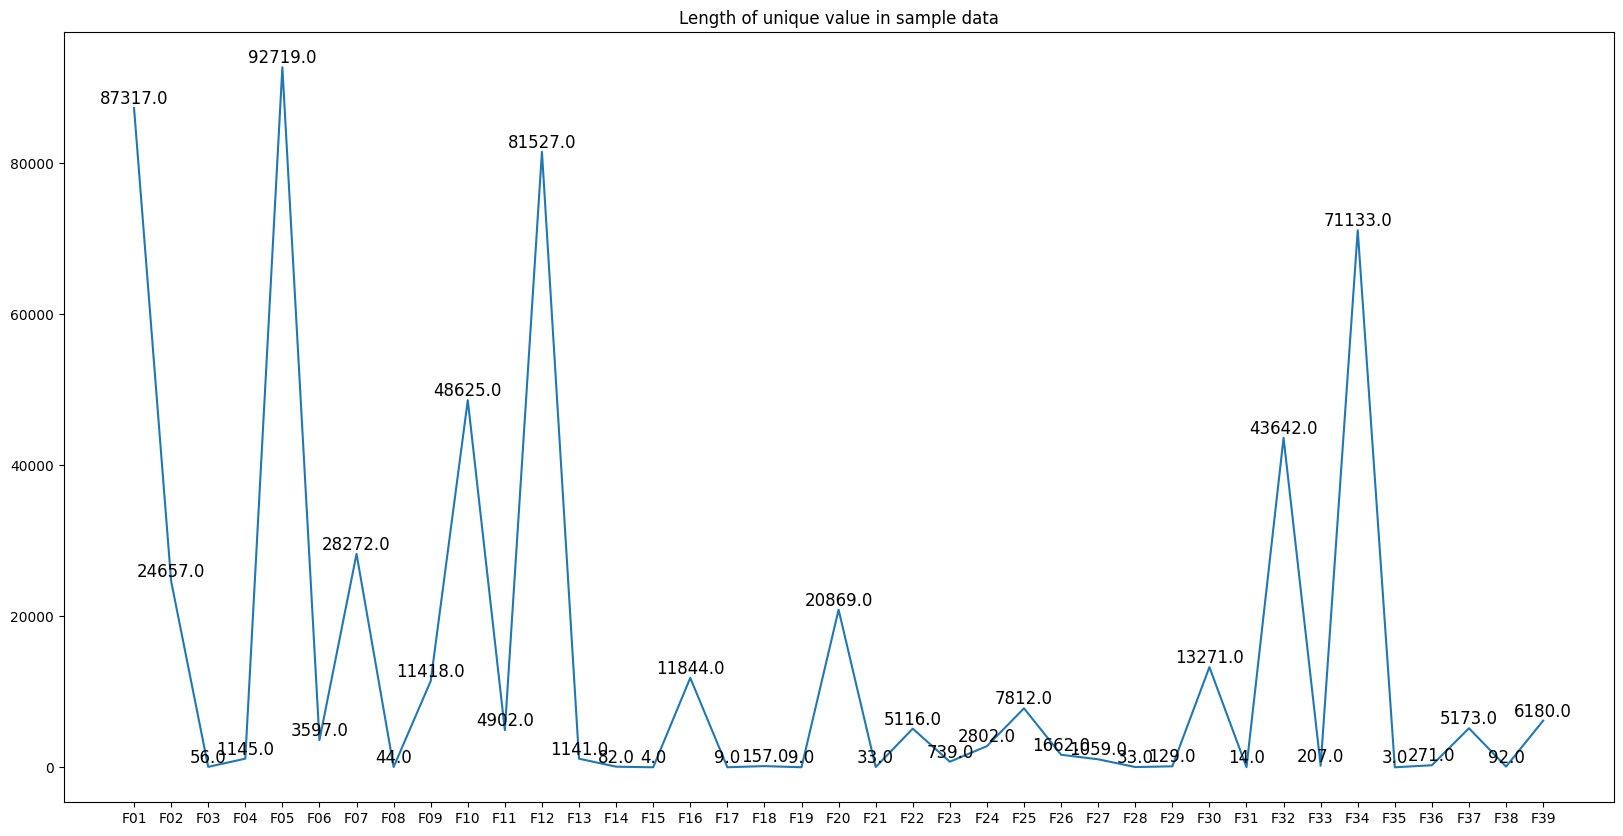

In [28]:
columns = X.columns.tolist()

value_of_unique_df = {}

for col in columns:
    unique = len(df[col].unique())
    value_of_unique_df[col] = unique

plt.figure(figsize=(20, 10))
sns.lineplot(value_of_unique_df)
for key, value in value_of_unique_df.items():
    height = value
    plt.text(key, height+.25, "%.1f" %height, ha='center', va='bottom', size=12)
plt.title("Length of unique value in sample data")
plt.show()

In [29]:
num_cols = X.select_dtypes('number').columns
obj_cols = X.select_dtypes('object').columns

for col in num_cols:
    X[col].fillna(0,inplace=True)
    
X.fillna("NAN", inplace=True)

In [30]:
X[obj_cols] = X[obj_cols].astype('category')
X[num_cols] = X[num_cols].astype('int64')

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2)

In [32]:
import category_encoders as ce

enc = ce.TargetEncoder(cols=obj_cols).fit(X, y)
X_encoded = enc.transform(X)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics improt 

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.metrics import roc_auc_score, accuracy_score

# skf = StratifiedKFold(n_splits=5, shuffle=True)

# roc_scores = []
# acc_scores = []
# # 교차검증
# for train_idx, test_idx in skf.split(X_encoded, y):
#     print(f"Train indices: {train_idx}, \n",
#           f"Test indices: {test_idx}")
    
#     X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
#     cat = CatBoostClassifier(iterations=2000,
#                              verbose=500,
#                               learning_rate=0.01,
#                               l2_leaf_reg=5e-3,
#                               max_depth=16,
#                               task_type="GPU",
#                               devices='1')
    
#     cat.fit(X_train, y_train,
#             early_stopping_rounds=50)
    
#     y_pred = cat.predict(X_test)
    
#     roc = roc_auc_score(y_test, y_pred)
#     acc = accuracy_score(y_test, y_pred)
#     roc_scores.append(roc)
#     acc_scores.append(acc)
    
#     print(f"Roc Auc score: {roc}")
#     print(f'Accuracy: {acc}')

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_encoded, y,
                                            strati)

In [ ]:
test = pd.read_csv('./data/test.csv')
num_cols = test.select_dtypes('number').columns
obj_cols = test.select_dtypes('object').columns

for col in num_cols:
    test[col].fillna(0,inplace=True)
    
test.fillna("NAN", inplace=True)
test.drop('ID', axis=1, inplace=True)

sample_submission = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/sample_submission.csv')
sample_submission['Click'] = y_pred
sample_submission.to_csv('./data/sample_02.csv', index=False)

sample = pd.read_csv('./data/sample_02.csv')
sample.head()

In [ ]:
num_cols = test.select_dtypes('number').columns
obj_cols = test.select_dtypes('object').columns

for col in num_cols:
    test[col].fillna(0,inplace=True)
    
test.fillna("NAN", inplace=True)

In [ ]:
test.drop('ID', axis=1, inplace=True)

In [ ]:
test.shape

(4538541, 39)

In [ ]:
test_encoded = enc.transform(test)

In [ ]:
y_pred = lgbm.predict(test_encoded)

In [43]:
sample_submission = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/sample_submission.csv')
sample_submission['Click'] = y_pred
sample_submission.to_csv('./data/sample_02.csv', index=False)

In [45]:
sample = pd.read_csv('./data/sample_02.csv')
sample.head()

,ID,Click
0,TEST_0000000,0
1,TEST_0000001,0
2,TEST_0000002,0
3,TEST_0000003,0
4,TEST_0000004,0


In [46]:
sample.shape

(4538541, 2)

In [4]:
train = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/train.csv')
test = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/test.csv')

In [4]:
train.shape, test.shape

((28605391, 41), (4538541, 40))

### EDA

In [5]:
train.head()

,ID,Click,F01,F02,F03,F04,F05,F06,F07,F08,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,TRAIN_00000000,1,NSLHFNS,AVKQTCL,DTZFPRW,114.0,ISVXFVA,1,PQZBVMG,LPYPUNA,...,NZGEZLW,GTISJWW,380.0,2.0,AXQFZWC,IRUDRFB,NaN,TFJMLCZ,0.0,AURZYDY
1,TRAIN_00000001,0,VGIVWZQ,LSUSMVO,PQGWFJZ,26.0,NFRVLWS,43,IMPIGJT,MIGYEEG,...,NZGEZLW,GTISJWW,466.0,1.0,DRVVDHZ,IRUDRFB,19.0,AUGTURV,0.0,LUZRMLU
2,TRAIN_00000002,0,JCDXFYU,PILDDJU,IAGJDOH,119.0,LFPUEOV,0,FFUTIRZ,OFKQGTY,...,VHXETCF,KHZNEZF,197.0,0.0,QMOULXS,IRUDRFB,8.0,ZVSTLNM,0.0,MHBRSQK
3,TRAIN_00000003,1,PSMFWTP,ZYAVJHP,NaN,15.0,ATQPZSJ,26,ZDTZNSB,THBWWCD,...,IVIRTPR,GTISJWW,8640.0,0.0,IZLJUJS,IRUDRFB,14.0,ZBSRLCQ,0.0,GAZBSSZ
4,TRAIN_00000004,0,SLCRICD,QPQWGXA,NaN,13.0,CHZGJZR,20,PQZBVMG,MIGYEEG,...,NZGEZLW,WHSRKIM,41774.0,0.0,BHBIZCL,IRUDRFB,13.0,QHYLSBX,0.0,QTATWAY


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28605391 entries, 0 to 28605390
Data columns (total 41 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ID      object 
 1   Click   int64  
 2   F01     object 
 3   F02     object 
 4   F03     object 
 5   F04     float64
 6   F05     object 
 7   F06     int64  
 8   F07     object 
 9   F08     object 
 10  F09     object 
 11  F10     object 
 12  F11     float64
 13  F12     object 
 14  F13     object 
 15  F14     int64  
 16  F15     object 
 17  F16     object 
 18  F17     object 
 19  F18     float64
 20  F19     float64
 21  F20     object 
 22  F21     object 
 23  F22     object 
 24  F23     object 
 25  F24     float64
 26  F25     object 
 27  F26     object 
 28  F27     float64
 29  F28     object 
 30  F29     float64
 31  F30     object 
 32  F31     object 
 33  F32     float64
 34  F33     float64
 35  F34     object 
 36  F35     object 
 37  F36     float64
 38  F37     object 
 39  F38     float64
 40

In [7]:
train.isnull().sum()

ID              0
Click           0
F01       1234711
F02       1234711
F03      10543986
F04       5742331
F05       1234711
F06             0
F07             0
F08             0
F09             0
F10       1234711
F11       2955564
F12       1234711
F13             0
F14             0
F15      10543986
F16             0
F17             0
F18       7324999
F19       2588853
F20      10543986
F21             0
F22             0
F23             0
F24       8994270
F25             0
F26      10543986
F27      11063877
F28             0
F29      11063877
F30             0
F31             0
F32        251142
F33       2588853
F34       1234711
F35             0
F36       7324999
F37             0
F38        800058
F39             0
dtype: int64

In [8]:
train[train['Click'] == 0]

,ID,Click,F01,F02,F03,F04,F05,F06,F07,F08,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
1,TRAIN_00000001,0,VGIVWZQ,LSUSMVO,PQGWFJZ,26.0,NFRVLWS,43,IMPIGJT,MIGYEEG,...,NZGEZLW,GTISJWW,466.0,1.0,DRVVDHZ,IRUDRFB,19.0,AUGTURV,0.0,LUZRMLU
2,TRAIN_00000002,0,JCDXFYU,PILDDJU,IAGJDOH,119.0,LFPUEOV,0,FFUTIRZ,OFKQGTY,...,VHXETCF,KHZNEZF,197.0,0.0,QMOULXS,IRUDRFB,8.0,ZVSTLNM,0.0,MHBRSQK
4,TRAIN_00000004,0,SLCRICD,QPQWGXA,NaN,13.0,CHZGJZR,20,PQZBVMG,MIGYEEG,...,NZGEZLW,WHSRKIM,41774.0,0.0,BHBIZCL,IRUDRFB,13.0,QHYLSBX,0.0,QTATWAY
5,TRAIN_00000005,0,ZRTPTHN,WOAIOXV,NaN,10.0,KGRHDVF,771,PQZBVMG,FTPHMPQ,...,HBBSHXY,NYWYONG,109018.0,0.0,GIEMYWV,MNBSNJV,2.0,PJKCVNE,0.0,JGNZTTM
7,TRAIN_00000007,0,KTNHUXF,YSUQLFP,NaN,NaN,FNSJIGF,3,PQZBVMG,SODVHOK,...,NZGEZLW,GTISJWW,4073.0,0.0,WTYAPBF,IRUDRFB,NaN,JVISOPG,0.0,GWGUHEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28605384,TRAIN_28605384,0,VQKUOEH,ZFBHQNZ,NOENOSO,26.0,XYUOMRJ,0,SRASZSC,FTPHMPQ,...,MFPUCBU,NYWYONG,1779.0,0.0,EBNECWK,IRUDRFB,NaN,ODMETKK,0.0,NSFPDTP
28605385,TRAIN_28605385,0,CNVTOWI,QCUKFVY,DTZFPRW,NaN,ZODVJHI,-1,LYZYJCC,LPYPUNA,...,OCUEWCS,KDTWELZ,8749.0,0.0,HEGLPHM,IRUDRFB,NaN,SDQXPRS,0.0,LWUKTUV
28605386,TRAIN_28605386,0,NLVEHEJ,TQLUNHQ,DTZFPRW,7.0,TSAHWRE,1,RLRNZDM,SODVHOK,...,TANUHHL,GTISJWW,43.0,3.0,PNSISZF,IRUDRFB,6.0,TFJMLCZ,0.0,ZBOTIHF
28605387,TRAIN_28605387,0,GGCUFPH,JLGELTR,IAGJDOH,NaN,MZOKJAS,26,GIHHVOP,IGQGIJM,...,FGOVFJM,GTISJWW,4341.0,0.0,AJHSFUP,IRUDRFB,NaN,BBDNLVH,0.0,LXTGFRC


In [9]:
train[train['Click']==1]

,ID,Click,F01,F02,F03,F04,F05,F06,F07,F08,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,TRAIN_00000000,1,NSLHFNS,AVKQTCL,DTZFPRW,114.0,ISVXFVA,1,PQZBVMG,LPYPUNA,...,NZGEZLW,GTISJWW,380.0,2.0,AXQFZWC,IRUDRFB,NaN,TFJMLCZ,0.0,AURZYDY
3,TRAIN_00000003,1,PSMFWTP,ZYAVJHP,NaN,15.0,ATQPZSJ,26,ZDTZNSB,THBWWCD,...,IVIRTPR,GTISJWW,8640.0,0.0,IZLJUJS,IRUDRFB,14.0,ZBSRLCQ,0.0,GAZBSSZ
6,TRAIN_00000006,1,JCDXFYU,PILDDJU,IAGJDOH,NaN,LFPUEOV,2,DYFKVIS,OFKQGTY,...,HBBSHXY,KHZNEZF,7768.0,NaN,QMOULXS,IRUDRFB,NaN,UPVVRGF,0.0,KHPZSFA
15,TRAIN_00000015,1,JCDXFYU,PILDDJU,IAGJDOH,123.0,LFPUEOV,59,UAFKSHB,FTPHMPQ,...,JAJWMQI,KHZNEZF,2964.0,0.0,QMOULXS,IRUDRFB,13.0,DYXQJGB,0.0,ZEXHSYF
18,TRAIN_00000018,1,JCDXFYU,PILDDJU,IAGJDOH,15.0,LFPUEOV,12,PQZBVMG,FTPHMPQ,...,CQXUROS,KHZNEZF,1412.0,1.0,QMOULXS,IRUDRFB,10.0,VXFUCMK,0.0,FOZWIIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28605380,TRAIN_28605380,1,CMGHZWE,VWWYNKT,DTZFPRW,34.0,GRWSORE,33,PQZBVMG,FTPHMPQ,...,WWWEXSL,WCMLPDK,17098.0,0.0,PDDTDCC,IRUDRFB,1.0,TFJMLCZ,0.0,TZGWIBF
28605381,TRAIN_28605381,1,HJKCJUT,LRAXIGH,DTZFPRW,156.0,AYMOFKC,9,PEQYIAH,LPYPUNA,...,NZGEZLW,KDTWELZ,10376.0,0.0,BHKMAZX,IRUDRFB,NaN,TFJMLCZ,0.0,LTFRLEO
28605383,TRAIN_28605383,1,NaN,NaN,PQGWFJZ,NaN,NaN,-1,ASDMUUP,THBWWCD,...,NZGEZLW,WCMLPDK,15330.0,0.0,NaN,IRUDRFB,NaN,AIWLPTY,0.0,KHEXOTP
28605389,TRAIN_28605389,1,RTCZYBD,FHCKUNS,HUUWYSX,91.0,EBCXZZE,0,UZJFCLM,FTPHMPQ,...,YIXFVTW,GTISJWW,1753.0,0.0,KRVDSGK,IRUDRFB,6.0,KTCQCEU,0.0,OYLBHKU


In [20]:
# id = train['ID']
X = train.drop(['ID', 'Click'], axis=1).copy()
y = train['Click'].copy()

In [21]:
y.value_counts()

0    23035531
1     5569860
Name: Click, dtype: int64

In [22]:
X_test = test.drop(['ID'], axis=1).copy()
test_id = test['ID']

In [24]:
obj_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes('number').columns

In [27]:
len_of_unique_obj_cols = {}
len_of_df = len(X)

for col in obj_cols:
    unique = len(train[col].unique())
    len_of_unique_obj_cols[col] = unique
    
len_of_unique_obj_cols

{'F01': 4760931,
 'F02': 304405,
 'F03': 64,
 'F05': 5343557,
 'F07': 151200,
 'F08': 79,
 'F09': 27551,
 'F10': 1404255,
 'F12': 4174064,
 'F13': 1307,
 'F15': 4,
 'F16': 15467,
 'F17': 10,
 'F20': 178603,
 'F21': 33,
 'F22': 7187,
 'F23': 950,
 'F25': 10700,
 'F26': 2205,
 'F28': 55,
 'F30': 19444,
 'F31': 14,
 'F34': 3165581,
 'F35': 3,
 'F37': 9423,
 'F39': 6800}

In [28]:
for col in num_cols:
    X[col] = X[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)
    
X = X.fillna('NAN')
X_test = X_test.fillna('NAN')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28605391 entries, 0 to 28605390
Data columns (total 39 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F01     object 
 1   F02     object 
 2   F03     object 
 3   F04     float64
 4   F05     object 
 5   F06     int64  
 6   F07     object 
 7   F08     object 
 8   F09     object 
 9   F10     object 
 10  F11     float64
 11  F12     object 
 12  F13     object 
 13  F14     int64  
 14  F15     object 
 15  F16     object 
 16  F17     object 
 17  F18     float64
 18  F19     float64
 19  F20     object 
 20  F21     object 
 21  F22     object 
 22  F23     object 
 23  F24     float64
 24  F25     object 
 25  F26     object 
 26  F27     float64
 27  F28     object 
 28  F29     float64
 29  F30     object 
 30  F31     object 
 31  F32     float64
 32  F33     float64
 33  F34     object 
 34  F35     object 
 35  F36     float64
 36  F37     object 
 37  F38     float64
 38  F39     object 
dtypes: float64(11), int

In [33]:
from category_encoders import CountEncoder

enc = CountEncoder(cols=obj_cols).fit(X, y)
X_train_encoded = enc.transform(X)
X_test_encoded = enc.transform(X_test)

KeyboardInterrupt: 

In [34]:
X

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
0,NSLHFNS,AVKQTCL,DTZFPRW,114.0,ISVXFVA,1,PQZBVMG,LPYPUNA,IZYJZDA,RANQNXO,...,NZGEZLW,GTISJWW,380.0,2.0,AXQFZWC,IRUDRFB,0.0,TFJMLCZ,0.0,AURZYDY
1,VGIVWZQ,LSUSMVO,PQGWFJZ,26.0,NFRVLWS,43,IMPIGJT,MIGYEEG,NGODWIN,GBQMJYF,...,NZGEZLW,GTISJWW,466.0,1.0,DRVVDHZ,IRUDRFB,19.0,AUGTURV,0.0,LUZRMLU
2,JCDXFYU,PILDDJU,IAGJDOH,119.0,LFPUEOV,0,FFUTIRZ,OFKQGTY,BEZTQIO,YLKUVQA,...,VHXETCF,KHZNEZF,197.0,0.0,QMOULXS,IRUDRFB,8.0,ZVSTLNM,0.0,MHBRSQK
3,PSMFWTP,ZYAVJHP,NAN,15.0,ATQPZSJ,26,ZDTZNSB,THBWWCD,LTETYBG,GEKHGQZ,...,IVIRTPR,GTISJWW,8640.0,0.0,IZLJUJS,IRUDRFB,14.0,ZBSRLCQ,0.0,GAZBSSZ
4,SLCRICD,QPQWGXA,NAN,13.0,CHZGJZR,20,PQZBVMG,MIGYEEG,LJBQPJW,SOKLCDW,...,NZGEZLW,WHSRKIM,41774.0,0.0,BHBIZCL,IRUDRFB,13.0,QHYLSBX,0.0,QTATWAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28605386,NLVEHEJ,TQLUNHQ,DTZFPRW,7.0,TSAHWRE,1,RLRNZDM,SODVHOK,IZYJZDA,ZPMODDZ,...,TANUHHL,GTISJWW,43.0,3.0,PNSISZF,IRUDRFB,6.0,TFJMLCZ,0.0,ZBOTIHF
28605387,GGCUFPH,JLGELTR,IAGJDOH,0.0,MZOKJAS,26,GIHHVOP,IGQGIJM,KLFHAUF,HBFALWV,...,FGOVFJM,GTISJWW,4341.0,0.0,AJHSFUP,IRUDRFB,0.0,BBDNLVH,0.0,LXTGFRC
28605388,SNXDPNU,VTPZTHN,KFOPSGX,92.0,ZTAHYDS,3,JXOLWIU,CZDUWVM,QBSGNGN,EWFXKQY,...,SLXYBBG,WCPHYPZ,25.0,2.0,XIPYLHN,IRUDRFB,20.0,OOQBJMI,0.0,XIWMBGB
28605389,RTCZYBD,FHCKUNS,HUUWYSX,91.0,EBCXZZE,0,UZJFCLM,FTPHMPQ,GJISCZS,RVGDHCT,...,YIXFVTW,GTISJWW,1753.0,0.0,KRVDSGK,IRUDRFB,6.0,KTCQCEU,0.0,OYLBHKU


RangeIndex(start=0, stop=28605391, step=1)

In [41]:
obj_cols.tolist()

['F01',
 'F02',
 'F03',
 'F05',
 'F07',
 'F08',
 'F09',
 'F10',
 'F12',
 'F13',
 'F15',
 'F16',
 'F17',
 'F20',
 'F21',
 'F22',
 'F23',
 'F25',
 'F26',
 'F28',
 'F30',
 'F31',
 'F34',
 'F35',
 'F37',
 'F39']

In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=200,
                           cat_features=[0, 1, 2, 4, 6, 7, 8, 9,
                                         11, 12, 14, 15, 16, 19, 20, 21, 22,
                                         24, 25, 27, 29, 30, 33, 34, 36, 38],
                            task_type='GPU',
                            devices='1',
                            eval_metric='AUC')

model.fit(X, y)

Learning rate set to 0.019172


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 3.88s	remaining: 1h 4m 36s
200:	total: 11m 47s	remaining: 46m 52s
400:	total: 22m 43s	remaining: 33m 56s
600:	total: 33m 20s	remaining: 22m 7s
800:	total: 43m 44s	remaining: 10m 52s
999:	total: 54m 15s	remaining: 0us


In [65]:
X_test = test.drop('ID', axis=1).copy()
X_test.shape

(4538541, 39)

In [66]:
for col in num_cols:
    X_test[col] = X_test[col].fillna(0)
X_test = X_test.fillna('NAN')

In [67]:
y_pred = model.predict(X_test)

In [69]:
y_pred.shape

(4538541,)

In [70]:
sample_submission = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/sample_submission.csv')
sample_submission['Click'] = y_pred

In [73]:
sample_submission.to_csv('/home/dabs/InHeon/데이콘/웹광고/data/cat.csv', index=False)

In [75]:
df = pd.read_csv('/home/dabs/InHeon/데이콘/웹광고/data/cat.csv')
df['Click'].value_counts()

0    4254092
1     284449
Name: Click, dtype: int64